In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is commonly used for its simplicity and interpretability. Here's a concise explanation of hierarchical clustering and its steps in three points:

1. Concept and Types
Concept: Hierarchical clustering creates a tree-like structure (dendrogram) to represent nested clusters at varying levels of similarity or distance.
Types: There are two main types of hierarchical clustering:
Agglomerative (bottom-up): Starts with each data point as an individual cluster and merges the closest pairs of clusters iteratively until only one cluster remains.
Divisive (top-down): Starts with all data points in one cluster and recursively splits the clusters until each data point is its own cluster. (Less common than agglomerative)

2. Steps in Agglomerative Hierarchical Clustering

Step 1: Compute Distance Matrix: Calculate the pairwise distances (or similarities) between all data points. Common distance metrics include Euclidean, Manhattan, or cosine distance.

Step 2: Merge Closest Clusters: Identify the pair of clusters with the smallest distance and merge them into a single cluster. Update the distance matrix to reflect this merge.

Step 3: Update Distance Matrix: After merging, update the distance matrix to reflect the distance between the newly formed cluster and all remaining clusters. Various linkage methods can be used for this, such as:

Single Linkage: Minimum distance between points in the two clusters.

Complete Linkage: Maximum distance between points in the two clusters.

Average Linkage: Average distance between points in the two clusters.

Ward's Method: Minimizes the total within-cluster variance.

3. Result and Interpretation
Dendrogram: The result of hierarchical clustering is a dendrogram, a tree-like diagram that shows the order in which clusters were merged (agglomerative) or split (divisive). The y-axis represents the distance or similarity at which clusters were combined.
Cluster Selection: To decide on the number of clusters, one can "cut" the dendrogram at a specific height, which corresponds to a chosen distance threshold. The number of vertical lines intersected by this cut represents the number of clusters.
Hierarchical clustering is useful for visualizing the nested structure of the data and determining the appropriate number of clusters based on the dendrogram.

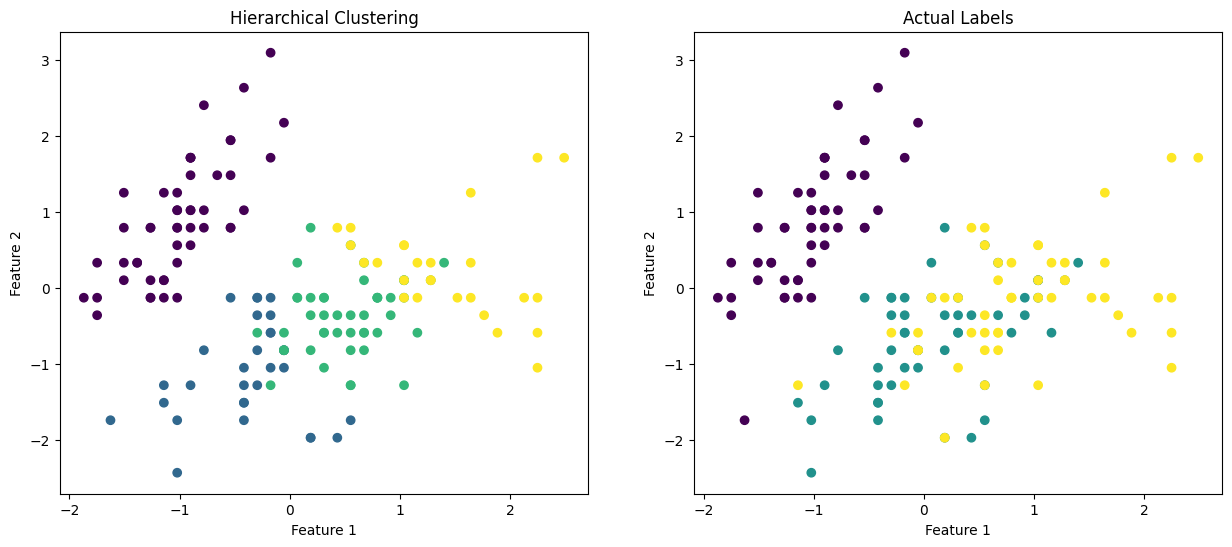

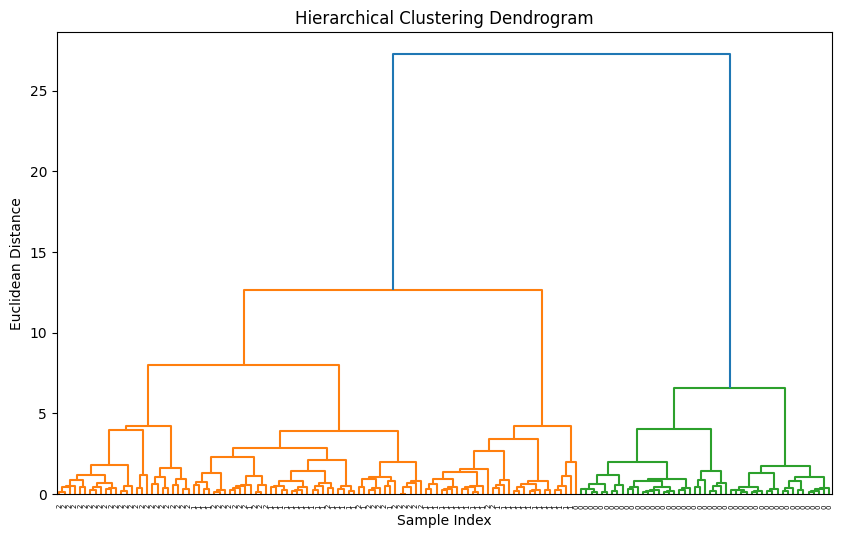

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Choose a cut-off distance to get 3 clusters, for example
distance_threshold = 7
clusters = fcluster(linked, distance_threshold, criterion='distance')

# Plotting the clusters and dendrogram
plt.figure(figsize=(15, 6))

# Plot for hierarchical clustering
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for actual labels
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', label=y)
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=y,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

plt.show()

#### Silhouette Score
The Silhouette Score evaluates the quality of clustering by assessing the cohesion and separation of clusters. It measures how similar a data point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates well-separated clusters, a value near 0 suggests overlapping clusters, and negative values indicate data points assigned to the wrong clusters. It helps in determining the optimal number of clusters, as higher silhouette scores imply more distinct clusters, facilitating better interpretation and analysis of the clustering results.

In [3]:
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Extract cluster labels with a specified distance threshold
distance_threshold = 7
clusters = fcluster(linked, distance_threshold, criterion='distance')

score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4006363159855973
